<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/notebook/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import sklearn
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/My Drive/ML/projects/feature_selection')

## Data Exploring

In [4]:
dt = pd.read_csv('train.csv')
dt.shape

(114321, 133)

In [5]:
dt.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,...,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,...,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,...,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,B,2.230754,1.990131,B,2.643678,J,NaN,13.777666,10.574713,1.511063,4.949609,7.180722,5.655086e-01,1.166281,1.956521,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,6.320087,NaN,10.991098,NaN,NaN,NaN,NaN,NaN,NaN,6.414567,HIT,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,6.083151,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,A,NaN,T,G,14.097099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [8]:
import collections
collections.Counter(dt['target'])

Counter({0: 27300, 1: 87021})

In [ ]:
var_type = []
[var_type.append(type(dt.iloc[0,i])) for i in range(len(dt.columns))]

In [9]:
import collections
collections.Counter(var_type)

Counter({float: 1, numpy.float64: 108, numpy.int64: 6, str: 18})

### Keep numerical columns

In [10]:
dt2 = dt.select_dtypes('number')
dt2.shape

(114321, 114)

In [11]:
dt2.isnull().sum(axis=0)

ID            0
target        0
v1        49832
v2        49796
v4        49796
          ...  
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 114, dtype: int64

### Remove observations with null values 

In [12]:
dt3 = dt2[dt2.isnull().sum(axis=1)==0]
dt3.shape

(62561, 114)

In [13]:
import collections
collections.Counter(dt3.isnull().sum(axis=0))

Counter({0: 114})

## Model training and feature selection

### Spliting data into train and validation

In [14]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(
    dt3.drop(labels=['target', 'ID'], axis=1),
    dt3['target'],
    test_size=0.3,
    random_state=6
)

In [15]:
train_x.shape, valid_x.shape

((43792, 112), (18769, 112))

### Data scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
train_x2, valid_x2 = scaler.transform(train_x), scaler.transform(valid_x)

### Using Lasso regression for feature selection

In [15]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [68]:
fea_sel = SelectFromModel(LogisticRegression(C=0.1,solver='saga',max_iter=100,penalty='l1'), max_features=30)

In [69]:
fea_sel.fit(train_x2, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='saga',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=30, norm_order=1, prefit=False, threshold=None)

In [70]:
fea_sel.get_support()

array([False, False, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True])

In [71]:
collections.Counter(fea_sel.get_support())

Counter({False: 82, True: 30})

In [72]:
train_x3, valid_x3 = fea_sel.transform(train_x2), fea_sel.transform(valid_x2)
train_x3.shape, valid_x3.shape

((43792, 30), (18769, 30))

In [73]:
lg = LogisticRegression(C=1,max_iter=100,penalty='l2')
lg.fit(train_x3, train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lg.score(train_x3, train_y)

0.7536536353671903

In [75]:
lg.score(valid_x3, valid_y)

0.7581117800628696

In [76]:
lg2 = LogisticRegression(C=1,max_iter=100,penalty='l2')
lg2.fit(train_x2, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lg2.score(valid_x2, valid_y)

0.7574191485960893

In [78]:
lg2.score(train_x2, train_y)

0.7539504932407746

## Recursive feature elimination

In [88]:
from sklearn.feature_selection import RFE

In [ ]:
lg = LogisticRegression(C=1,max_iter=100,penalty='l2')
rfe_ = RFE(lg, n_features_to_select=30)
rfe_fit = rfe_.fit(train_x2, train_y)

In [93]:
rfe_fit.support_

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

In [94]:
collections.Counter(rfe_fit.support_)

Counter({False: 82, True: 30})

In [96]:
train_x3, valid_x3 = rfe_fit.transform(train_x2),rfe_fit.transform(valid_x2)

In [98]:
lg = LogisticRegression(C=1,max_iter=100,penalty='l2')
lg.fit(train_x3, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
lg.score(valid_x3, valid_y)

0.7568330758165059

# Build MLP

In [17]:
import tensorflow as tf
from tensorflow import keras

In [52]:
mlp_m = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

mlp_m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
train_y = np.array(train_y).reshape(-1,1)
train_y.shape, train_x2.shape

((43792, 1), (43792, 112))

In [ ]:
mlp_m.fit(train_x2, train_y, epochs=50, validation_data=(valid_x2, valid_y))

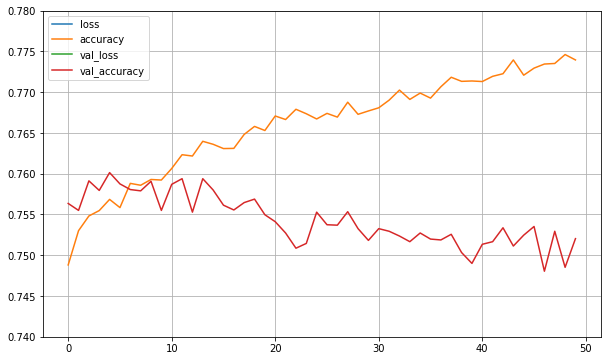

In [56]:
pd.DataFrame(mlp_m.history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0.74,0.78)
plt.show()